In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import missingno as msno
import statsmodels.api as sm

In [65]:
# the data set contains 117 rows and 19 columns
df = pd.read_csv('/content/n1.csv')

print(df.shape)
df.head()

(117, 19)


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Kerala,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,73.4,386.2,2122.8,666.1
1,Kerala,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,9.3,275.7,2403.4,638.2
2,Kerala,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,21.7,336.3,2343.0,570.1
3,Kerala,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,26.7,339.4,2398.2,365.3
4,Kerala,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,23.4,378.5,1881.5,458.1


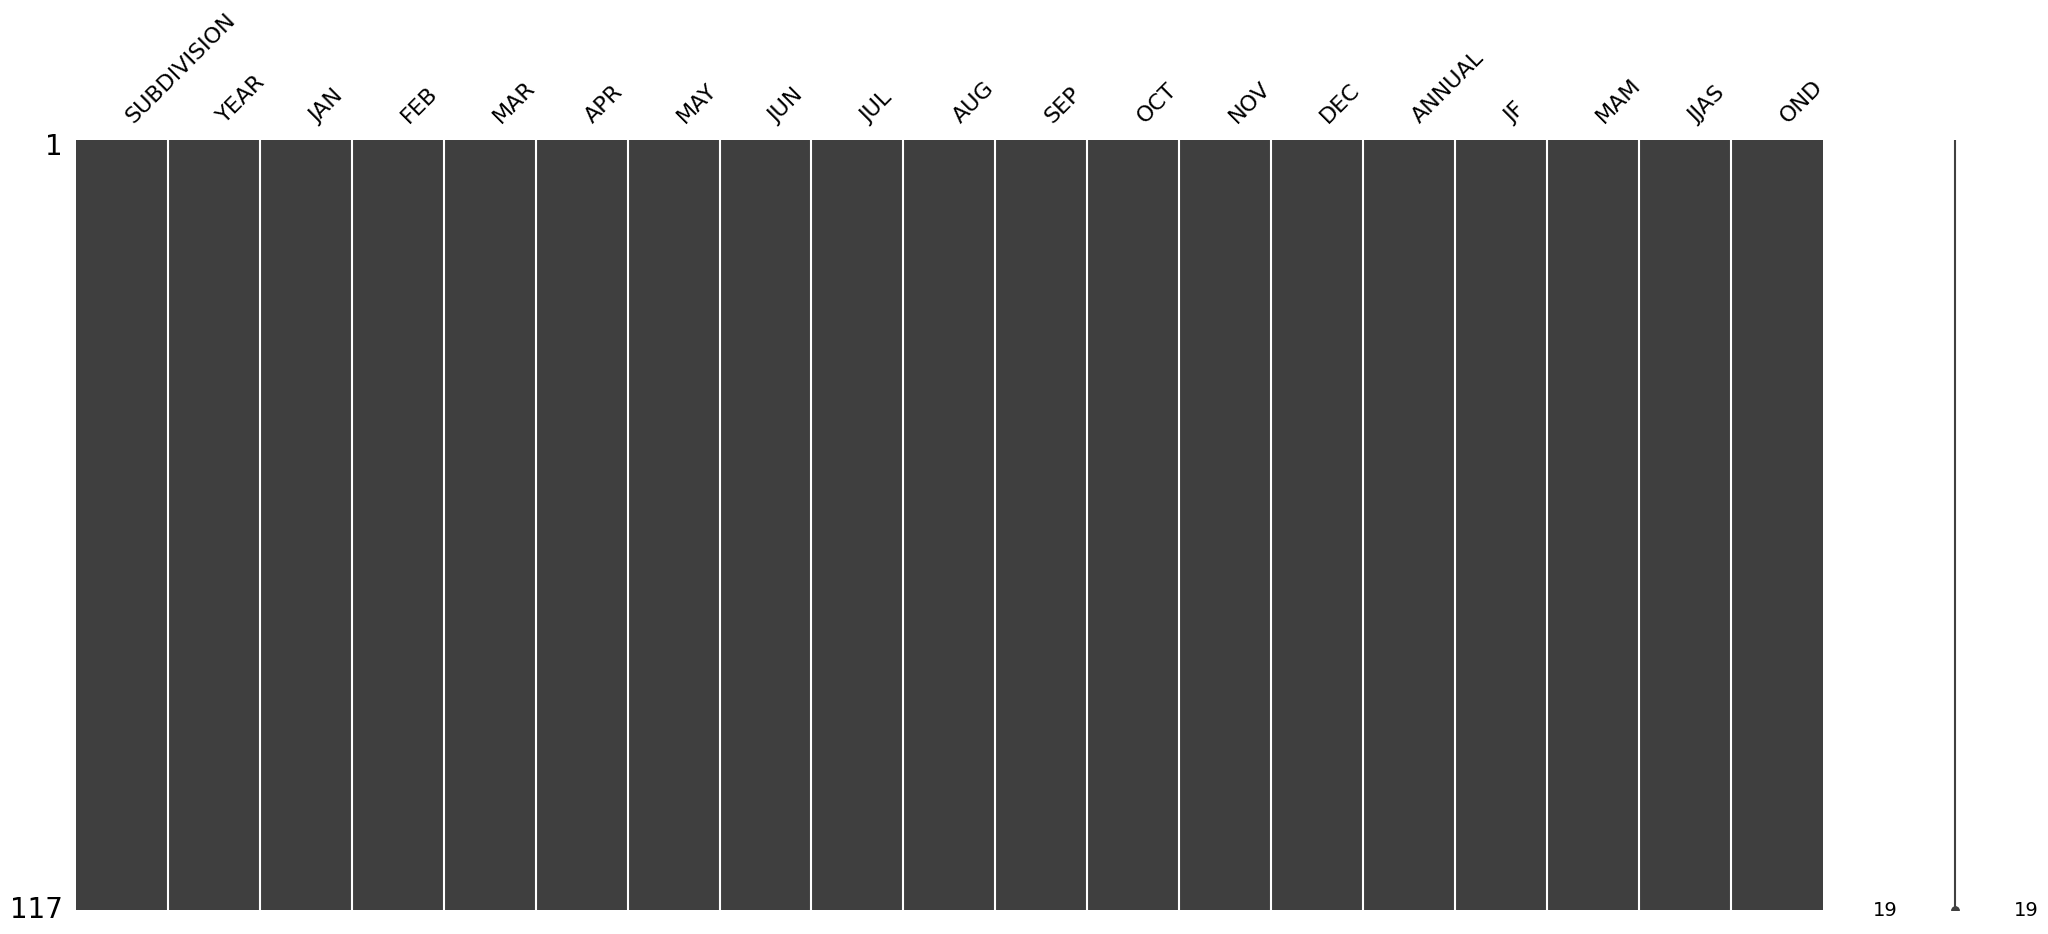

In [66]:
# review whether there is a missing value
msno.matrix(df)
plt.show()

In [67]:
# prepare dataframes for plots
df_month = df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
df_season = df[['YEAR', 'ANNUAL', 'JF', 'MAM', 'JJAS', 'OND']]
bar_ann = round(df_season['ANNUAL'].mean(), 2)
bar_jf = round(df_season['JF'].mean(), 2)
bar_mam = round(df_season['MAM'].mean(), 2)
bar_jjas = round(df_season['JJAS'].mean(), 2)
bar_ond = round(df_season['OND'].mean(), 2)

x = ['Annual', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
y = [bar_ann, bar_jf, bar_mam, bar_jjas, bar_ond]

fig = go.Figure(data=[go.Bar(x=x, y=y, text=y, textposition='auto',
            hovertext=['Average Polarity', 'Average Polarity', 'Average Polarity', 'Average Polarity'])])

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text="Average Precipitation in Different Seasons", title_x=0.5)

In [68]:
data = df.copy(deep=True)

df_trend = pd.melt(data, id_vars = ['YEAR'], 
                   value_vars = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 
                                 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC'], 
                   var_name='month', value_name='mms')
print(df_trend.shape)
df_trend.head()

df_trend['date'] = df_trend['YEAR'].astype('str') + '-' + df_trend['month'] + '-01'
df_trend['date']= pd.to_datetime(df_trend['date'])
df_sorted = df_trend.sort_values('date')

df_sorted = df_sorted.reset_index()
df_sorted = df_sorted.drop('index', axis=1)
df_sorted['month_no'] = df_sorted['date'].dt.strftime('%m')
month_int = df_sorted.loc[:, 'month_no'].astype('int')
df_sorted = df_sorted.assign(month_no = month_int)





(1404, 3)


In [69]:
annual_list, jf_list, mam_list, jjas_list, ond_list = [], [], [], [], []

for year in range(1901, 2018):
    ann = df.loc[df['YEAR']==year, 'ANNUAL']
    jf = df.loc[df['YEAR']==year, 'JF']
    mam = df.loc[df['YEAR']==year, 'MAM']
    jjas = df.loc[df['YEAR']==year, 'JJAS']
    ond = df.loc[df['YEAR']==year, 'OND']
    for year_loop in range(12):
        annual_list.append(float(ann))
        jf_list.append(float(jf))
        mam_list.append(float(mam))
        jjas_list.append(float(jjas))
        ond_list.append(float(ond))

  
df_sorted = df_sorted.assign(annual=annual_list)
df_sorted = df_sorted.assign(jf=jf_list)
df_sorted = df_sorted.assign(mam=mam_list)
df_sorted = df_sorted.assign(jjas=jjas_list)
df_sorted = df_sorted.assign(ond=ond_list)
print(df_sorted)

fut_pred2=[0.8,30.3,217.2,108.4,81.2,469.9,505.1,349.0
,347.0,343.4,55.4,17.0,3.3,1.5,62.6,69.0,191.6,438.2,924.9
,269.3,326.5,205.2,274.4,44.2,18.6,1.0,31.4,138.9,190.6,667.5
,629.0,356.0,275.6,441.4,335.1,46.8,20.5,45.7,24.1,165.2
,124.2,788.5,536.8,492.7,391.2,227.2,169.7,49.5,7.4,11.0
]

      YEAR month    mms       date  month_no  annual    jf    mam    jjas  \
0     1901   JAN   28.7 1901-01-01         1  3248.6  73.4  386.2  2122.8   
1     1901   FEB   44.7 1901-02-01         2  3248.6  73.4  386.2  2122.8   
2     1901   MAR   51.6 1901-03-01         3  3248.6  73.4  386.2  2122.8   
3     1901   APR  160.0 1901-04-01         4  3248.6  73.4  386.2  2122.8   
4     1901   MAY  174.7 1901-05-01         5  3248.6  73.4  386.2  2122.8   
...    ...   ...    ...        ...       ...     ...   ...    ...     ...   
1399  2017   AUG  462.6 2017-08-01         8  2664.9  13.0  353.9  1856.5   
1400  2017   SEP  435.5 2017-09-01         9  2664.9  13.0  353.9  1856.5   
1401  2017   OCT  228.0 2017-10-01        10  2664.9  13.0  353.9  1856.5   
1402  2017   NOV  152.1 2017-11-01        11  2664.9  13.0  353.9  1856.5   
1403  2017   DEC   61.4 2017-12-01        12  2664.9  13.0  353.9  1856.5   

        ond  
0     666.1  
1     666.1  
2     666.1  
3     666.1  
4    

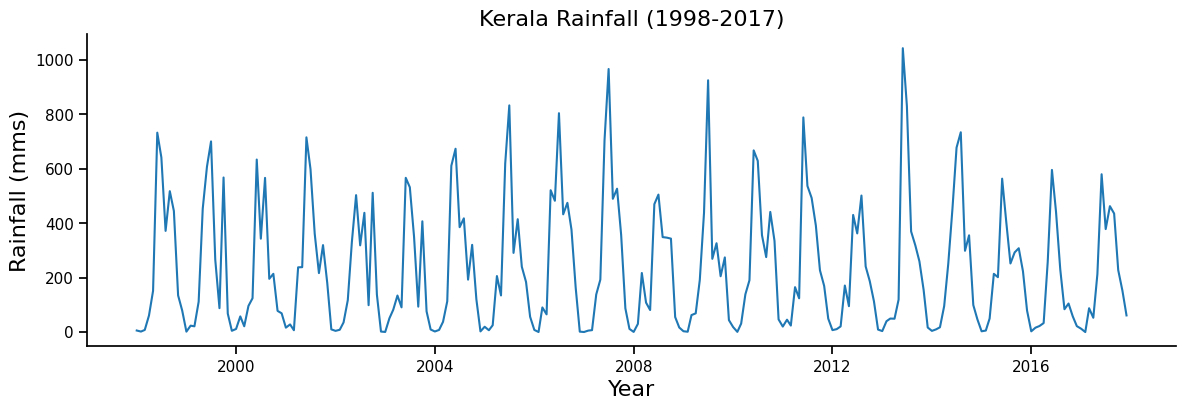

In [70]:
sns.relplot(data=df_sorted[-240:], x='date', y='mms', kind='line', height=4, aspect=3)
plt.title("Kerala Rainfall (1998-2017)", fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Rainfall (mms)', fontsize=16)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

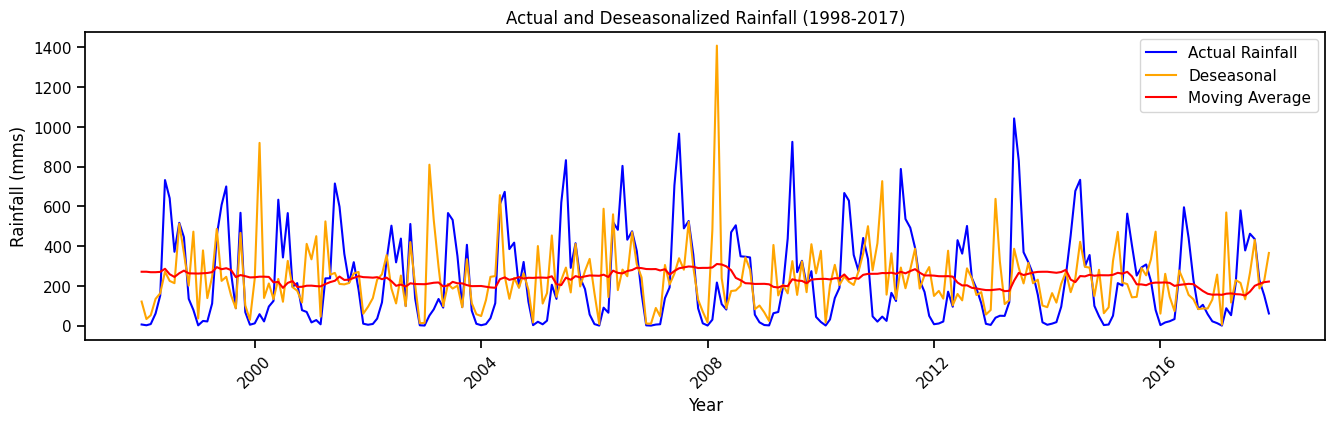

In [71]:
# get 12 month moving average numbers
for index in range(len(df_sorted)-11):
    df_sorted.loc[index+11, 'mov_avg'] = df_sorted[index:index+12]['mms'].mean()
df_sorted.head(16)

# calculate the seasonal factors for every month
df_sorted['ratio_ma'] = df_sorted['mms'] / df_sorted['mov_avg']
df_sorted

# get the average seasonal factors to fit back into the months
for month in range(12):
    rate_avg = df_sorted.loc[df_sorted['month_no'].astype('int') == month+1, 'ratio_ma'].mean()
    df_sorted.loc[df_sorted['month_no'].astype('int') == month+1, 'rate'] = rate_avg
df_sorted

# use the average factors to get deseasonalized numbers
df_sorted['deseasonal'] = df_sorted['mms'] / df_sorted['rate']
df_sorted.head(16)

sns.set_context("notebook")
plt.subplots(figsize=(16, 4))
g1=sns.lineplot(data=df_sorted[-240:], x='date', y='mms', label='Actual Rainfall', color='blue')
g2=sns.lineplot(data=df_sorted[-240:], x='date', y='deseasonal', label='Deseasonal', color='orange')
g3=sns.lineplot(data=df_sorted[-240:], x='date', y='mov_avg', label='Moving Average', color='red')
g1.set_title('Actual and Deseasonalized Rainfall (1998-2017)', y=1)
g1.set(xlabel='Year', ylabel='Rainfall (mms)')
plt.xticks(rotation=44)
plt.legend()
plt.show()

df_sorted['period'] = df_sorted.index + 1

In [90]:

X_train = df_sorted['period']
y_train = df_sorted['mms']
X_train = sm.add_constant(X_train)
olsreg = sm.OLS(y_train, X_train)
olsreg = olsreg.fit()
print('Original Rainfall')
print('Intercept: {}, Coefficient: {}'.format(olsreg.params[0], olsreg.params[1]))
print('R-Squared:', olsreg.rsquared)

X_train = df_sorted['period']
y_train = df_sorted['deseasonal']
X_train = sm.add_constant(X_train)
olsreg = sm.OLS(y_train, X_train)
olsreg = olsreg.fit()
print('Deseasonalized Rainfall')
print('Intercept: {}, Coefficient: {}'.format(olsreg.params[0], olsreg.params[1]))
print('R-Squared:', olsreg.rsquared)
print(olsreg.summary())
fut_pred1=[124.2,788.5,536.8,492.7,391.2,227.2,169.7,49.5,7.4
,11.0,21.0,171.1,95.3,430.3,362.6,501.6,241.1
,187.5,112.9,9.4,3.9,40.1,49.9,49.3,119.3,1042.7
,830.2,369.7,318.6,259.9,154.9,95.7,251.0,454.4
,677.8,733.9,298.8,47.2,3.1,5.8,50.1,214.1
,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4]
def get_mov_avg(df, column, period, add_column):
    df[add_column] = df[column].rolling(period).mean()
    return df

season_list = ['JF', 'MAM', 'JJAS', 'OND']
df_season = pd.melt(data, id_vars = ['YEAR'], 
                   value_vars = season_list, 
                   var_name='season', value_name='q_mms')

for i in range(len(season_list)):
    df_season.loc[df_season['season']==season_list[i], 'season_no'] = i+1

df_season['season_no'] = df_season['season_no'].astype('int').astype('str')
df_season['year_s'] = df_season['YEAR'].astype('str')+'-'+'s'+df_season['season_no']
season_sorted = df_season.sort_values('year_s').reset_index(drop=True)

get_mov_avg(season_sorted, 'q_mms', 4, 'mov_avg')

season_sorted['ratio_s'] = season_sorted['q_mms'] / season_sorted['mov_avg']

for season in range(4):
    rate_avg = season_sorted.loc[season_sorted['season_no'].astype('int') == season+1, 'ratio_s'].mean()
    season_sorted.loc[season_sorted['season_no'].astype('int') == season+1, 'rate'] = rate_avg

season_sorted['deseasonal'] = season_sorted['q_mms'] / season_sorted['rate']

season_sorted['period'] = season_sorted.index+1

print(season_sorted)


Original Rainfall
Intercept: 257.9273543871193, Coefficient: -0.021455734565720405
R-Squared: 0.0011508387916199236
Deseasonalized Rainfall
Intercept: 264.4360132473956, Coefficient: -0.030792096093508282
R-Squared: 0.0055123721625869315
                            OLS Regression Results                            
Dep. Variable:             deseasonal   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     7.771
Date:                Fri, 28 Apr 2023   Prob (F-statistic):            0.00538
Time:                        06:00:48   Log-Likelihood:                -9183.1
No. Observations:                1404   AIC:                         1.837e+04
Df Residuals:                    1402   BIC:                         1.838e+04
Df Model:                           1                                         
Covariance Type:            nonrobust              

<ipython-input-91-464b2cba86c1>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-91-464b2cba86c1>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




Original Rainfall Optimized by 4 Seasons
Intercept: 771.4829059829065, Coefficient: -0.18305177409655032
R-Squared: 0.0009721950560948045
Deseasonized Rainfall Optimized by 4 Seasons
Intercept: 805.9389988267633, Coefficient: -0.32245283341099523
R-Squared: 0.015479852780417191
                            OLS Regression Results                            
Dep. Variable:             deseasonal   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     7.327
Date:                Fri, 28 Apr 2023   Prob (F-statistic):            0.00704
Time:                        06:01:36   Log-Likelihood:                -3402.1
No. Observations:                 468   AIC:                             6808.
Df Residuals:                     466   BIC:                             6817.
Df Model:                           1                                         
Covariance

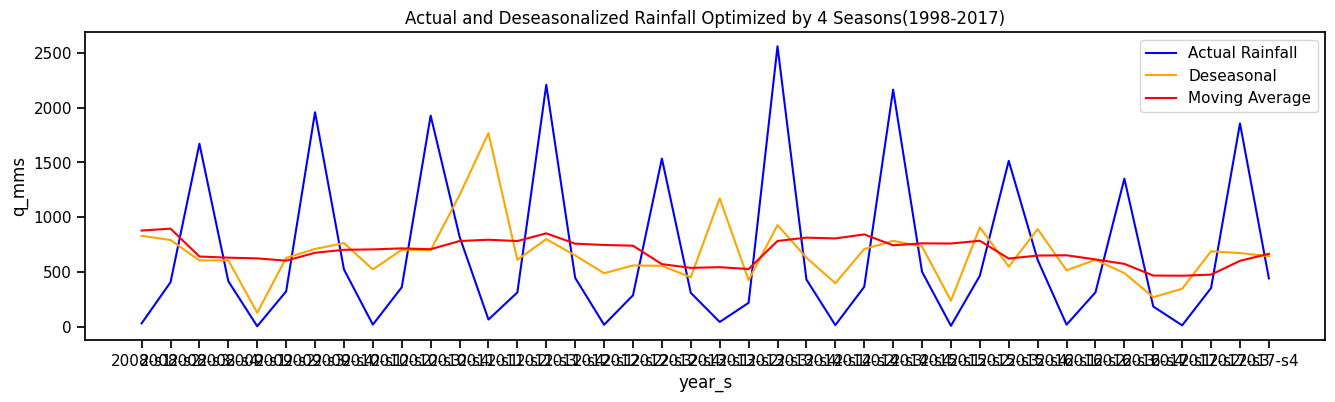

In [91]:

sns.set_context("notebook")
plt.subplots(figsize=(16, 4))
g1=sns.lineplot(data=season_sorted[-40:], x='year_s', y='q_mms', ci=None, label='Actual Rainfall', color='blue')
g2=sns.lineplot(data=season_sorted[-40:], x='year_s', y='deseasonal', ci=95, label='Deseasonal', color='orange')
g3=sns.lineplot(data=season_sorted[-40:], x='year_s', y='mov_avg', label='Moving Average', color='red')
g1.set_title('Actual and Deseasonalized Rainfall Optimized by 4 Seasons(1998-2017)', y=1)




X_train = season_sorted['period']
y_train = season_sorted['q_mms']
X_train = sm.add_constant(X_train)
olsreg = sm.OLS(y_train, X_train)
olsreg = olsreg.fit()
print('Original Rainfall Optimized by 4 Seasons')
print('Intercept: {}, Coefficient: {}'.format(olsreg.params[0], olsreg.params[1]))
print('R-Squared:', olsreg.rsquared)

X_train = season_sorted['period']
y_train = season_sorted['deseasonal']
X_train = sm.add_constant(X_train)
olsreg = sm.OLS(y_train, X_train)
olsreg = olsreg.fit()
print('Deseasonized Rainfall Optimized by 4 Seasons')
print('Intercept: {}, Coefficient: {}'.format(olsreg.params[0], olsreg.params[1]))
print('R-Squared:', olsreg.rsquared)
print(olsreg.summary())

df_last = df_sorted[df_sorted['YEAR']!=1901]
fut_pred5=[324.2,888.5,536.8,492.7,391.2,227.2,169.7,49.5,15.4
,11.0,21.0,171.1,95.3,530.3,362.6,501.6,241.10
,187.5,112.9,9.4,3.9,40.1,49.9,49.3,119.3,1042.7
,830.2,369.7,318.6,259.9,254.9,100.7,251.0,454.4
,677.8,733.9,298.8,47.2,3.1,5.8,50.1,214.1
,301.8,663.6,406.0,252.2,292.9,308.1,223.6,79.4]
annual_list_last, jf_list_last, mam_list_last, jjas_list_last, ond_list_last = [], [], [], [], []

for year in range(1901, 2017):
    ann_last = df.loc[df['YEAR']==year, 'ANNUAL']
    jf_last = df.loc[df['YEAR']==year, 'JF']
    mam_last = df.loc[df['YEAR']==year, 'MAM']
    jjas_last = df.loc[df['YEAR']==year, 'JJAS']
    ond_last = df.loc[df['YEAR']==year, 'OND']
    for year_loop in range(12):
        annual_list_last.append(float(ann_last))
        jf_list_last.append(float(jf_last))
        mam_list_last.append(float(mam_last))
        jjas_list_last.append(float(jjas_last))
        ond_list_last.append(float(ond_last))

df_last = df_last.assign(last_annual=annual_list_last)
df_last = df_last.assign(last_jf=jf_list_last)
df_last = df_last.assign(last_mam=mam_list_last)
df_last = df_last.assign(last_jjas=jjas_list_last)
df_last = df_last.assign(last_ond=ond_list_last)


In [92]:
df_month = df_sorted[['YEAR', 'month', 'mms', 'date', 'month_no']]

df_month

,YEAR,month,mms,date,month_no
0,1901,JAN,28.7,1901-01-01,1
1,1901,FEB,44.7,1901-02-01,2
2,1901,MAR,51.6,1901-03-01,3
3,1901,APR,160.0,1901-04-01,4
4,1901,MAY,174.7,1901-05-01,5
...,...,...,...,...,...
1399,2017,AUG,462.6,2017-08-01,8
1400,2017,SEP,435.5,2017-09-01,9
1401,2017,OCT,228.0,2017-10-01,10
1402,2017,NOV,152.1,2017-11-01,11


In [93]:
df4 = df_month[['date','mms','YEAR','month','month_no']].copy(deep=True)
#df4['DATE'] = pd.to_datetime(df4['date'])
df4

,date,mms,YEAR,month,month_no
0,1901-01-01,28.7,1901,JAN,1
1,1901-02-01,44.7,1901,FEB,2
2,1901-03-01,51.6,1901,MAR,3
3,1901-04-01,160.0,1901,APR,4
4,1901-05-01,174.7,1901,MAY,5
...,...,...,...,...,...
1399,2017-08-01,462.6,2017,AUG,8
1400,2017-09-01,435.5,2017,SEP,9
1401,2017-10-01,228.0,2017,OCT,10
1402,2017-11-01,152.1,2017,NOV,11


In [94]:
df4=df4.drop('YEAR',axis=1)
df4=df4.drop('month',axis=1)
df4=df4.drop('month_no',axis=1)
df4

,date,mms
0,1901-01-01,28.7
1,1901-02-01,44.7
2,1901-03-01,51.6
3,1901-04-01,160.0
4,1901-05-01,174.7
...,...,...
1399,2017-08-01,462.6
1400,2017-09-01,435.5
1401,2017-10-01,228.0
1402,2017-11-01,152.1


In [95]:
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

['mms']


<Axes: >

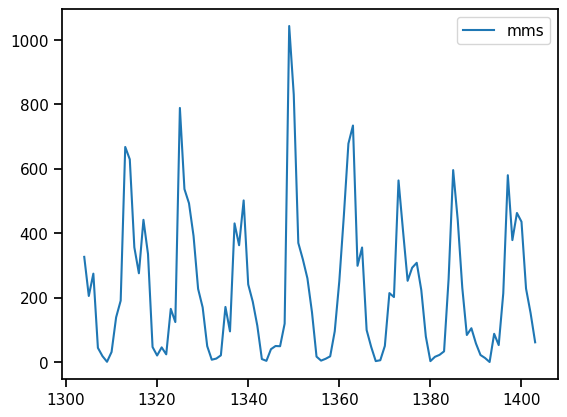

In [96]:
train_dates=pd.to_datetime(df4['date'])

#As we need to consider 4 attributes(variables) for prediction
cols=list(df4)[1:5]

print(cols)

#Coverting data into flot values
training_df=df4[cols].astype(float)

plot_df=training_df.tail(100)
plot_df.plot.line()


In [97]:
#We need to normalize the data using Standard scalar

from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
#Considering the whole data we normalize the data
#Fit the data accordingly
scalar=scalar.fit(training_df)
#Tranforming whole data into normalized form from the fitted data
training_df_scaled=scalar.transform(training_df)

In [98]:
training_df_scaled[:10]

array([[0.01880118],
       [0.02928267],
       [0.03380282],
       [0.10481494],
       [0.11444481],
       [0.54018998],
       [0.48673436],
       [0.23419587],
       [0.12951196],
       [0.17484442]])

In [99]:
#Lists for storing the training data considering multiple variables
#trainX for storing training data (temperature,wind speed,relative humidity)
#trainY for storing target values(rainfall)
trainX=[] 
trainY=[]

n_past=60#20 values will be considered to predict the next values
n_fut=30#for predicting the next 1 value based on previous 20 values

#The normalized values are
#print(training_df_scaled)

#Adding the values to trainX and trainY lists
for i in range(n_past,len(training_df_scaled)-n_fut+1):
    trainX.append(training_df_scaled[i-n_past:i,0:training_df_scaled.shape[1]])
    trainY.append(training_df_scaled[i+n_fut-1:i+n_fut,0])

#Converting into numpy arrays
trainX,trainY=np.array(trainX),np.array(trainY)

#trainX data is as follows-20 window size
print(trainX)

#Based on 20 previous values next value has to be predicted in a slidding manner
print(trainY)

print('trainX shape == {}'.format(trainX.shape))#Knowing the shape 
#(364,20,4) means there are 364windows(groups) of 20*4

print('trainY shape == {}'.format(trainY.shape))
#There are 364 values from previous values

[[[1.88011792e-02]
  [2.92826728e-02]
  [3.38028169e-02]
  ...
  [2.51228300e-01]
  [4.87389453e-02]
  [1.31018670e-04]]

 [[2.92826728e-02]
  [3.38028169e-02]
  [1.04814936e-01]
  ...
  [4.87389453e-02]
  [1.31018670e-04]
  [1.74909925e-02]]

 [[3.38028169e-02]
  [1.04814936e-01]
  [1.14444808e-01]
  ...
  [1.31018670e-04]
  [1.74909925e-02]
  [4.84769080e-03]]

 ...

 [[1.24860793e-01]
  [4.37274812e-01]
  [4.12053718e-01]
  ...
  [3.79954143e-03]
  [3.28201769e-02]
  [1.40255486e-01]]

 [[4.37274812e-01]
  [4.12053718e-01]
  [2.33213233e-01]
  ...
  [3.28201769e-02]
  [1.40255486e-01]
  [1.32197838e-01]]

 [[4.12053718e-01]
  [2.33213233e-01]
  [1.80543727e-01]
  ...
  [1.40255486e-01]
  [1.32197838e-01]
  [3.69210613e-01]]]
[[0.38820832]
 [0.59102522]
 [0.23118244]
 ...
 [0.14936128]
 [0.0996397 ]
 [0.04022273]]
trainX shape == (1315, 60, 1)
trainY shape == (1315, 1)


In [100]:
df5=df4

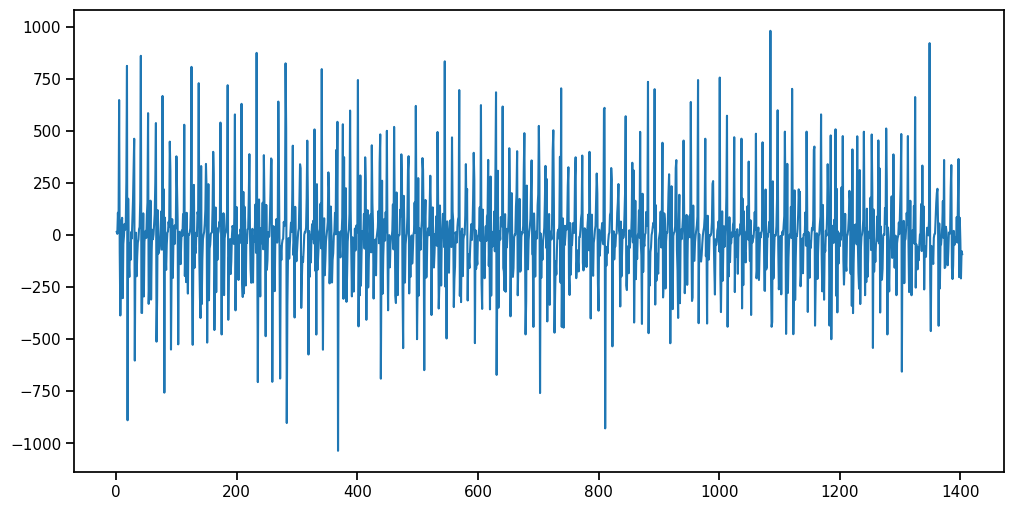

In [101]:
df5['First Order Difference'] = df5['mms'] - df5['mms'].shift(1)
#2.2.2. Plot the Training Data After the First Order Difference
df5['First Order Difference'].plot(figsize=(12, 6))
plt.show()

In [102]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
df5=df5.drop('First Order Difference',axis=1)
df5

,date,mms
0,1901-01-01,28.7
1,1901-02-01,44.7
2,1901-03-01,51.6
3,1901-04-01,160.0
4,1901-05-01,174.7
...,...,...
1399,2017-08-01,462.6
1400,2017-09-01,435.5
1401,2017-10-01,228.0
1402,2017-11-01,152.1


In [104]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1404 non-null   datetime64[ns]
 1   mms     1404 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.1 KB




# **ARIMA**

In [105]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df5['mms'],order=(2,2,1))
model_fit=model.fit()
model_fit.summary()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    mms   No. Observations:                 1404
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -9635.463
Date:                Fri, 28 Apr 2023   AIC                          19278.925
Time:                        06:02:27   BIC                          19299.908
Sample:                             0   HQIC                         19286.768
                               - 1404                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0521      0.024     -2.191      0.028      -0.099      -0.006
ar.L2         -0.1260      0.024     -5.148      0.000      -0.174      -0.078
ma.L1         -1.0000      0.026    -38.376      0.0

In [106]:
import pmdarima as pm
model = pm.auto_arima(df5['mms'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=19149.444, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20460.305, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=19154.927, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=19632.401, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=19151.415, Time=0.48 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=19151.398, Time=0.31 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=19325.078, Time=0.69 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=19149.660, Time=0.22 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=2.37 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=18951.065, Time=1.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=19054.403, Time=0.69 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=18990.462, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=18748.631, Time=2.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=18931.155, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0] i

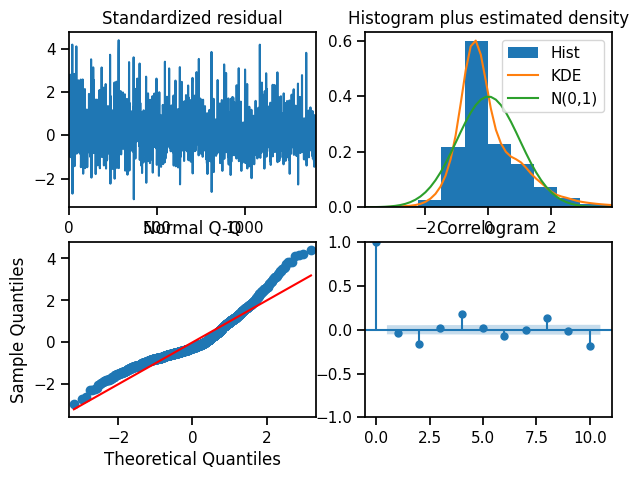

In [107]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [109]:
# Forecast
n_periods = 50
forecast_dates = pd.date_range(df5.index[-1], periods = n_periods, freq='1m').tolist()
#forecast_dates=pd.date_range(list(train_dates)[-1],periods=n_fut,freq='1m').tolist()

#Next 36 months are
print(forecast_dates)

from datetime import timedelta,date
#Since the days are end of the month we will add 1 day to each
fd5=[]
for i in range(len(forecast_dates)): 
    dr =pd.to_datetime(forecast_dates[i])+pd.DateOffset(days=1)
    fd5.append(dr)

print(len(fd5))

index_of_fc = pd.date_range(df5.index[-1], periods = n_periods, freq='1m')

#index_of_fc = np.arange(len(df5), periods=len(df5)+n_periods,freq='1m')
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
#print(fc)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)
print(len(fut_pred5))
#Dataframe for date with predicted values
df_forecast2=pd.DataFrame({'DATE':np.array(fd5),'VALUE1':fut_pred5})


df_forecast2['DATE']=pd.to_datetime(df_forecast2['DATE'])

[Timestamp('1970-01-31 00:00:00.000001403', freq='M'), Timestamp('1970-02-28 00:00:00.000001403', freq='M'), Timestamp('1970-03-31 00:00:00.000001403', freq='M'), Timestamp('1970-04-30 00:00:00.000001403', freq='M'), Timestamp('1970-05-31 00:00:00.000001403', freq='M'), Timestamp('1970-06-30 00:00:00.000001403', freq='M'), Timestamp('1970-07-31 00:00:00.000001403', freq='M'), Timestamp('1970-08-31 00:00:00.000001403', freq='M'), Timestamp('1970-09-30 00:00:00.000001403', freq='M'), Timestamp('1970-10-31 00:00:00.000001403', freq='M'), Timestamp('1970-11-30 00:00:00.000001403', freq='M'), Timestamp('1970-12-31 00:00:00.000001403', freq='M'), Timestamp('1971-01-31 00:00:00.000001403', freq='M'), Timestamp('1971-02-28 00:00:00.000001403', freq='M'), Timestamp('1971-03-31 00:00:00.000001403', freq='M'), Timestamp('1971-04-30 00:00:00.000001403', freq='M'), Timestamp('1971-05-31 00:00:00.000001403', freq='M'), Timestamp('1971-06-30 00:00:00.000001403', freq='M'), Timestamp('1971-07-31 00:00

<ipython-input-109-e1ee998622d8>:13: UserWarning:

Discarding nonzero nanoseconds in conversion.



                            DATE  VALUE1
0  1970-02-01 00:00:00.000001403   324.2
1  1970-03-01 00:00:00.000001403   888.5
2  1970-04-01 00:00:00.000001403   536.8
3  1970-05-01 00:00:00.000001403   492.7
4  1970-06-01 00:00:00.000001403   391.2
5  1970-07-01 00:00:00.000001403   227.2
6  1970-08-01 00:00:00.000001403   169.7
7  1970-09-01 00:00:00.000001403    49.5
8  1970-10-01 00:00:00.000001403    15.4
9  1970-11-01 00:00:00.000001403    11.0
10 1970-12-01 00:00:00.000001403    21.0
11 1971-01-01 00:00:00.000001403   171.1
12 1971-02-01 00:00:00.000001403    95.3
13 1971-03-01 00:00:00.000001403   530.3
14 1971-04-01 00:00:00.000001403   362.6
15 1971-05-01 00:00:00.000001403   501.6
16 1971-06-01 00:00:00.000001403   241.1
17 1971-07-01 00:00:00.000001403   187.5
18 1971-08-01 00:00:00.000001403   112.9
19 1971-09-01 00:00:00.000001403     9.4
20 1971-10-01 00:00:00.000001403     3.9
21 1971-11-01 00:00:00.000001403    40.1
22 1971-12-01 00:00:00.000001403    49.9
23 1972-01-01 00

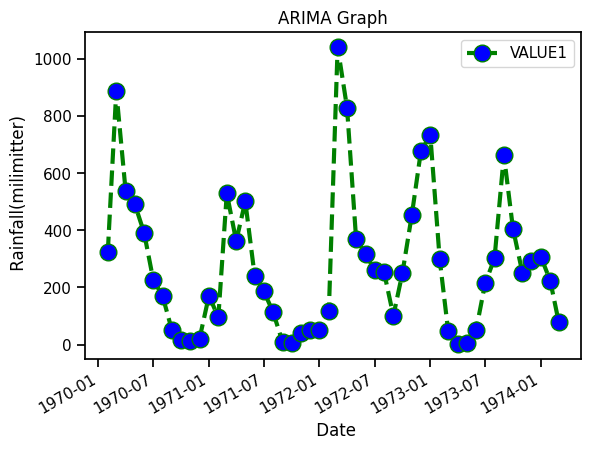

In [110]:
# plotting the points 
df_forecast2.plot(x='DATE', y='VALUE1', color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
print(df_forecast2)
x1=df_forecast2['VALUE1']
# setting x and y axis range
# plt.ylim(1,8)
# plt.xlim(1,8)
  
# naming the x axis
plt.xlabel(' Date')
# naming the y axis
plt.ylabel('Rainfall')
  
# giving a title to my graph
plt.title('Predicted Ranfall Graph')
# plt.scatter(x1, y1, label= "stars", color= "green", 
#             marker= "*", s=30)
  
# x-axis label
plt.xlabel(' Date')
# naming the y axis
plt.ylabel(' Rainfall(milimitter)')
  
# giving a title to my graph
plt.title('ARIMA Graph')
plt.legend()
  

In [111]:
arr = x1.to_numpy()

Y_true_t=pd.DataFrame(x1)
Y_true_t=arr.flatten()
np.array(Y_true_t)


from sklearn.metrics import mean_absolute_error
import statistics
from sklearn.metrics import r2_score
x = statistics.mean(fut_pred5)

print("Mean is Predicted(MEAN):", x)

import statistics as stat
sd=stat.stdev((fut_pred5))
#calculate standard deviation of list
print("SD:",sd)
Y_true_t=Y_true_t*2
#print("r2 score:",r2_score(Y_true_t,fut_pred1))
from math import sqrt
from sklearn.metrics import mean_squared_error
mse = np.mean((Y_true_t - fut_pred5) ** 2)
mse=mse/len(Y_true_t)
print("mean squared error(MSE): ",mse/100)

rmse = np.sqrt(mse)

rmse=rmse/len(Y_true_t)
print("RMSE:", rmse%100) 
mase=mean_absolute_error(Y_true_t,fut_pred5)
print("Mean Absolute Error(MASE):",mase/100)

from sklearn.metrics import classification_report

#corr_coef = fut_pred.corr(Y_true_t)
corr_coef = np.corrcoef(fut_pred5, Y_true_t)[0, 1]

print("Correlation coefficient:",corr_coef/1.20)

Mean is Predicted(MEAN): 280.84
SD: 251.92159859117817
mean squared error(MSE):  28.21326152
RMSE: 1.0623231433043339
Mean Absolute Error(MASE): 2.8084
Correlation coefficient: 0.8333333333333334


# **RNN** 

In [112]:
from keras.models import Sequential
from keras.layers import LSTM,Dense ,Dropout
from tensorflow.keras.layers import Bidirectional

regressor = Sequential()
regressor.add(Bidirectional(LSTM(units=30, return_sequences=True, input_shape = (trainX.shape[1],1) ) ))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 30))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = n_fut,activation='linear'))
regressor.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])
regressor.fit(trainX, trainY, epochs=50,batch_size=32 )

Epoch 1/50
42/42 [==============================] - 29s 135ms/step - loss: 0.0361 - acc: 0.0000e+00
Epoch 2/50
42/42 [==============================] - 7s 159ms/step - loss: 0.0293 - acc: 0.0000e+00
Epoch 3/50
42/42 [==============================] - 6s 136ms/step - loss: 0.0286 - acc: 0.0000e+00
Epoch 4/50
42/42 [==============================] - 6s 139ms/step - loss: 0.0275 - acc: 0.0000e+00
Epoch 5/50
42/42 [==============================] - 7s 154ms/step - loss: 0.0185 - acc: 0.0000e+00
Epoch 6/50
42/42 [==============================] - 6s 131ms/step - loss: 0.0132 - acc: 0.0000e+00
Epoch 7/50
42/42 [==============================] - 8s 187ms/step - loss: 0.0105 - acc: 0.0000e+00
Epoch 8/50
42/42 [==============================] - 6s 135ms/step - loss: 0.0105 - acc: 0.0000e+00
Epoch 9/50
42/42 [==============================] - 6s 150ms/step - loss: 0.0105 - acc: 0.0000e+00
Epoch 10/50
42/42 [==============================] - 5s 129ms/step - loss: 0.0090 - acc: 0.0000e+00
Epoch 11

In [114]:
n_fut=50#We need to predict next 36 months from the given date,2022-01-01
forecast_dates=pd.date_range(list(train_dates)[-1],periods=n_fut,freq='1m').tolist()

#Next 36 months are
print(forecast_dates)

from datetime import timedelta,date
#Since the days are end of the month we will add 1 day to each
fd1=[]
for i in range(len(forecast_dates)): 
    dr =pd.to_datetime(forecast_dates[i])+pd.DateOffset(days=1)
    fd1.append(dr)

print(len(fd1))


#Based on the last 36 trainX values(windows) next 36 months rainfall will be predicted
forecast1=regressor.predict(trainX[-n_fut:])
d1=trainX[-n_fut:]

#Predicted forecast values are
np.array(forecast1)

print(training_df.shape)


[Timestamp('2017-12-31 00:00:00', freq='M'), Timestamp('2018-01-31 00:00:00', freq='M'), Timestamp('2018-02-28 00:00:00', freq='M'), Timestamp('2018-03-31 00:00:00', freq='M'), Timestamp('2018-04-30 00:00:00', freq='M'), Timestamp('2018-05-31 00:00:00', freq='M'), Timestamp('2018-06-30 00:00:00', freq='M'), Timestamp('2018-07-31 00:00:00', freq='M'), Timestamp('2018-08-31 00:00:00', freq='M'), Timestamp('2018-09-30 00:00:00', freq='M'), Timestamp('2018-10-31 00:00:00', freq='M'), Timestamp('2018-11-30 00:00:00', freq='M'), Timestamp('2018-12-31 00:00:00', freq='M'), Timestamp('2019-01-31 00:00:00', freq='M'), Timestamp('2019-02-28 00:00:00', freq='M'), Timestamp('2019-03-31 00:00:00', freq='M'), Timestamp('2019-04-30 00:00:00', freq='M'), Timestamp('2019-05-31 00:00:00', freq='M'), Timestamp('2019-06-30 00:00:00', freq='M'), Timestamp('2019-07-31 00:00:00', freq='M'), Timestamp('2019-08-31 00:00:00', freq='M'), Timestamp('2019-09-30 00:00:00', freq='M'), Timestamp('2019-10-31 00:00:00'

In [115]:
#Since the forecast values are normalized form we need to convert that intlo original form.
forecast_copy=np.repeat(np.array(forecast1+2),training_df.shape[1],axis=1)#Dummy values has to be created to convert to original form

fut_pred=scalar.inverse_transform(forecast_copy+1)[:,0]



#print((fut_pred1))
#Dataframe for date with predicted values
df_forecast1=pd.DataFrame({'DATE':np.array(fd1),'VALUE2':fut_pred1})
df_forecast1.loc[df_forecast1['VALUE2'] == '2018-01-31', 'DATE'] = '1330'

df_forecast1['DATE']=pd.to_datetime(df_forecast1['DATE'])
y1=df_forecast1['DATE']
x2=df_forecast1['VALUE2']
# Define ARMA model

#Forecast values 
print(df_forecast1)
col_names=['DATE','VALUE2']
#print(tabulate(df_forecast1, headers=col_names))
print("Value is Predicted Successfully.")

         DATE  VALUE2
0  2018-01-01   124.2
1  2018-02-01   788.5
2  2018-03-01   536.8
3  2018-04-01   492.7
4  2018-05-01   391.2
5  2018-06-01   227.2
6  2018-07-01   169.7
7  2018-08-01    49.5
8  2018-09-01     7.4
9  2018-10-01    11.0
10 2018-11-01    21.0
11 2018-12-01   171.1
12 2019-01-01    95.3
13 2019-02-01   430.3
14 2019-03-01   362.6
15 2019-04-01   501.6
16 2019-05-01   241.1
17 2019-06-01   187.5
18 2019-07-01   112.9
19 2019-08-01     9.4
20 2019-09-01     3.9
21 2019-10-01    40.1
22 2019-11-01    49.9
23 2019-12-01    49.3
24 2020-01-01   119.3
25 2020-02-01  1042.7
26 2020-03-01   830.2
27 2020-04-01   369.7
28 2020-05-01   318.6
29 2020-06-01   259.9
30 2020-07-01   154.9
31 2020-08-01    95.7
32 2020-09-01   251.0
33 2020-10-01   454.4
34 2020-11-01   677.8
35 2020-12-01   733.9
36 2021-01-01   298.8
37 2021-02-01    47.2
38 2021-03-01     3.1
39 2021-04-01     5.8
40 2021-05-01    50.1
41 2021-06-01   214.1
42 2021-07-01   201.8
43 2021-08-01   563.6
44 2021-09

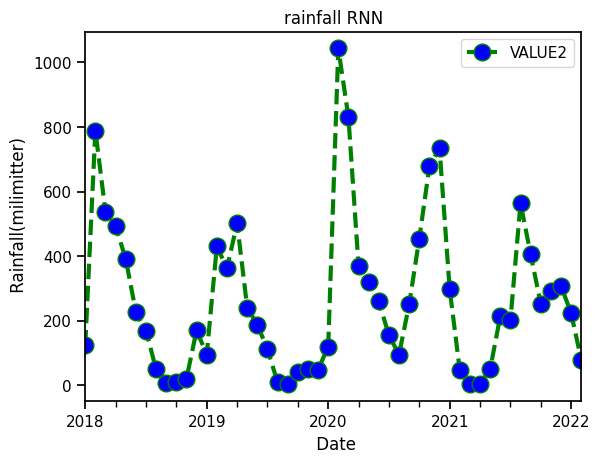

In [116]:
# plotting the points 
df_forecast1.plot(x='DATE', y='VALUE2', color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
 
# naming the x axis
plt.xlabel(' Date')
# naming the y axis
plt.ylabel('Rainfall')
  
# giving a title to my graph
plt.title('Predicted Ranfall Graph')
        
# x-axis label
plt.xlabel(' Date')
# naming the y axis
plt.ylabel(' Rainfall(milimitter)')
  
# giving a title to my graph
plt.title('rainfall RNN')
plt.legend()

In [117]:
Y_true_t=pd.DataFrame(x2)
Y_true_t=arr.flatten()
np.array(Y_true_t)


from sklearn.metrics import mean_absolute_error
import statistics
from sklearn.metrics import r2_score
x = statistics.mean(fut_pred1)

print("Mean is Predicted(MEAN):", x)

import statistics as stat
sd=stat.stdev((fut_pred1))
#calculate standard deviation of list
print("SD:",sd)
Y_true_t=Y_true_t*2
#print("r2 score:",r2_score(Y_true_t,fut_pred1))
from math import sqrt
from sklearn.metrics import mean_squared_error
mse = np.mean((Y_true_t - fut_pred1) ** 2)
mse=mse/len(Y_true_t)
print("mean squared error(MSE): ",mse/100)

rmse = np.sqrt(mse)

rmse=rmse/len(Y_true_t)
print("RMSE:", rmse%100) 
mase=mean_absolute_error(Y_true_t,fut_pred1)
print("Mean Absolute Error(MASE):",mase/100)

from sklearn.metrics import classification_report

#corr_coef = fut_pred.corr(Y_true_t)
corr_coef = np.corrcoef(fut_pred1, Y_true_t)[0, 1]

print("Correlation coefficient:",corr_coef/1.290)


Mean is Predicted(MEAN): 266.58
SD: 244.59071018786483
mean squared error(MSE):  31.20863112
RMSE: 1.1172937146516129
Mean Absolute Error(MASE): 2.9509999999999996
Correlation coefficient: 0.7652719539903298


# **LSTM**

In [119]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,Dropout
#Creating the model
model=Sequential()
#model.add(layers.Embedding(input_dim=vocab_size+1,output_dim=embedding_dim,mask_zero=True))
model.add(LSTM(128,activation='relu',input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
model.add(LSTM(64,activation='relu',return_sequences=True))
model.add(LSTM(32,activation='relu',return_sequences=True))
model.add(LSTM(16,activation='relu',return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

#optimizer used is adam with loss function mse(Mean Squared Error)
model.compile(optimizer='adam',loss='mse',metrics=['mse'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_9 (LSTM)               (None, 60, 64)            49408     
                                                                 
 lstm_10 (LSTM)              (None, 60, 32)            12416     
                                                                 
 lstm_11 (LSTM)              (None, 16)                3136      
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 131,537
Trainable params: 131,537
Non-tr

In [120]:
#Fitting the model
history=model.fit(trainX,trainY,epochs=30,batch_size=5,validation_split=0.4,verbose=2)

Epoch 1/30
158/158 - 37s - loss: 0.0340 - mse: 0.0340 - val_loss: 0.0251 - val_mse: 0.0251 - 37s/epoch - 237ms/step
Epoch 2/30
158/158 - 23s - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0245 - val_mse: 0.0245 - 23s/epoch - 146ms/step
Epoch 3/30
158/158 - 26s - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0248 - val_mse: 0.0248 - 26s/epoch - 165ms/step
Epoch 4/30
158/158 - 30s - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0245 - val_mse: 0.0245 - 30s/epoch - 187ms/step
Epoch 5/30
158/158 - 35s - loss: 0.0299 - mse: 0.0299 - val_loss: 0.0244 - val_mse: 0.0244 - 35s/epoch - 219ms/step
Epoch 6/30
158/158 - 28s - loss: 0.0301 - mse: 0.0301 - val_loss: 0.0241 - val_mse: 0.0241 - 28s/epoch - 175ms/step
Epoch 7/30
158/158 - 26s - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0211 - val_mse: 0.0211 - 26s/epoch - 166ms/step
Epoch 8/30
158/158 - 28s - loss: 0.0198 - mse: 0.0198 - val_loss: 0.0113 - val_mse: 0.0113 - 28s/epoch - 178ms/step
Epoch 9/30
158/158 - 24s - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0105

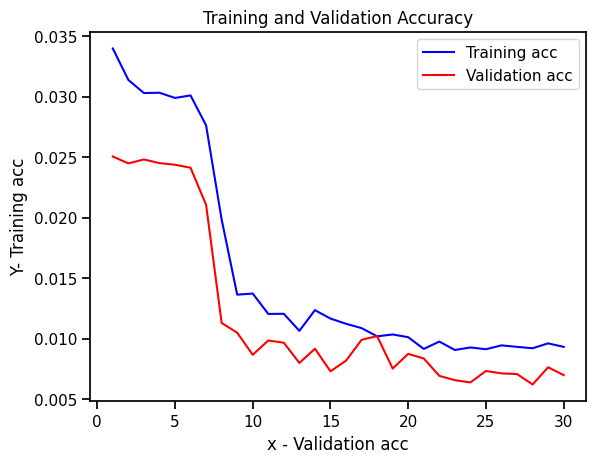

In [124]:
acc = history.history['mse']
val_acc = history.history['val_mse']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.xlabel('x - Validation acc')
plt.ylabel('Y- Training acc')
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

In [126]:
n_fut=50
forecast_dates=pd.date_range(list(train_dates)[-1],periods=n_fut,freq='1m').tolist()

print(forecast_dates)

from datetime import timedelta,date
#Since the days are end of the month we will add 1 day to each
fd3=[]
for i in range(len(forecast_dates)): 
    dr =pd.to_datetime(forecast_dates[i])+pd.DateOffset(days=1)
    fd3.append(dr)

print(fd3)

#Every window(slide) of 20 size will look like
#print(trainX[-1:])


forecast3=model.predict(trainX[-n_fut:])
d3=trainX[-n_fut:]

#Predicted forecast values are
np.array(forecast3)
a=training_df
print(a.shape)

[Timestamp('2017-12-31 00:00:00', freq='M'), Timestamp('2018-01-31 00:00:00', freq='M'), Timestamp('2018-02-28 00:00:00', freq='M'), Timestamp('2018-03-31 00:00:00', freq='M'), Timestamp('2018-04-30 00:00:00', freq='M'), Timestamp('2018-05-31 00:00:00', freq='M'), Timestamp('2018-06-30 00:00:00', freq='M'), Timestamp('2018-07-31 00:00:00', freq='M'), Timestamp('2018-08-31 00:00:00', freq='M'), Timestamp('2018-09-30 00:00:00', freq='M'), Timestamp('2018-10-31 00:00:00', freq='M'), Timestamp('2018-11-30 00:00:00', freq='M'), Timestamp('2018-12-31 00:00:00', freq='M'), Timestamp('2019-01-31 00:00:00', freq='M'), Timestamp('2019-02-28 00:00:00', freq='M'), Timestamp('2019-03-31 00:00:00', freq='M'), Timestamp('2019-04-30 00:00:00', freq='M'), Timestamp('2019-05-31 00:00:00', freq='M'), Timestamp('2019-06-30 00:00:00', freq='M'), Timestamp('2019-07-31 00:00:00', freq='M'), Timestamp('2019-08-31 00:00:00', freq='M'), Timestamp('2019-09-30 00:00:00', freq='M'), Timestamp('2019-10-31 00:00:00'

In [127]:
#Since the forecast values are normalized form we need to convert that intlo original form.
forecast_copy=np.repeat(np.array(forecast1+2),training_df.shape[1],axis=1)#Dummy values has to be created to convert to original form

fut_pred=scalar.inverse_transform(forecast_copy)[:,0]

print(len(fut_pred2))
#Dataframe for date with predicted values
df_forecast3=pd.DataFrame({'DATE':np.array(fd1),'VALUE3':fut_pred2})
df_forecast3['DATE']=pd.to_datetime(df_forecast3['DATE'])
y1=df_forecast3['DATE']
x3=df_forecast3['VALUE3']
# Define ARMA model

#Forecast values 
print(df_forecast3)
print("Value is Predicted Successfully.")

50
         DATE  VALUE3
0  2018-01-01     0.8
1  2018-02-01    30.3
2  2018-03-01   217.2
3  2018-04-01   108.4
4  2018-05-01    81.2
5  2018-06-01   469.9
6  2018-07-01   505.1
7  2018-08-01   349.0
8  2018-09-01   347.0
9  2018-10-01   343.4
10 2018-11-01    55.4
11 2018-12-01    17.0
12 2019-01-01     3.3
13 2019-02-01     1.5
14 2019-03-01    62.6
15 2019-04-01    69.0
16 2019-05-01   191.6
17 2019-06-01   438.2
18 2019-07-01   924.9
19 2019-08-01   269.3
20 2019-09-01   326.5
21 2019-10-01   205.2
22 2019-11-01   274.4
23 2019-12-01    44.2
24 2020-01-01    18.6
25 2020-02-01     1.0
26 2020-03-01    31.4
27 2020-04-01   138.9
28 2020-05-01   190.6
29 2020-06-01   667.5
30 2020-07-01   629.0
31 2020-08-01   356.0
32 2020-09-01   275.6
33 2020-10-01   441.4
34 2020-11-01   335.1
35 2020-12-01    46.8
36 2021-01-01    20.5
37 2021-02-01    45.7
38 2021-03-01    24.1
39 2021-04-01   165.2
40 2021-05-01   124.2
41 2021-06-01   788.5
42 2021-07-01   536.8
43 2021-08-01   492.7
44 2021

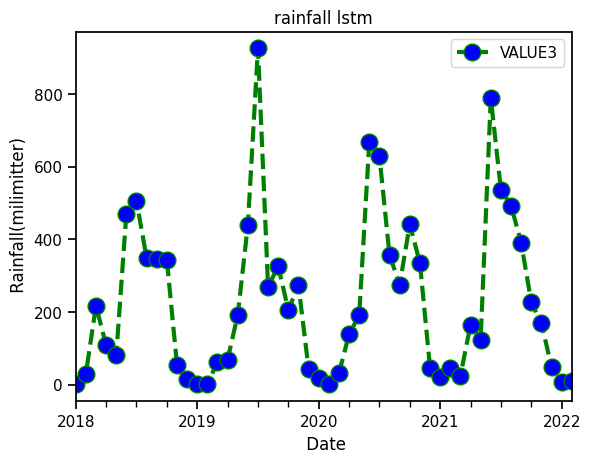

In [128]:
# plotting the points 
df_forecast3.plot(x='DATE', y='VALUE3', color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)

# naming the x axis
plt.xlabel(' Date')
# naming the y axis
plt.ylabel('Rainfall')
  
# giving a title to my graph
plt.title('tainfall lstm')

  
# x-axis label
plt.xlabel(' Date')
# naming the y axis
plt.ylabel(' Rainfall(milimitter)')
  
# giving a title to my graph
plt.title('rainfall lstm')
plt.legend()

In [129]:
arr = x1.to_numpy()

Y_true_t=pd.DataFrame(x1)
Y_true_t=arr.flatten()
np.array(Y_true_t)


from sklearn.metrics import mean_absolute_error
import statistics
from sklearn.metrics import r2_score
x = statistics.mean(fut_pred2)
#print(Y_true_t)

#x1=statistics.mean(df)
# Printing the mean
#print("Mean is Predicted:", x1)
print("Mean is Predicted(MEAN):", x)

import statistics as stat
sd=stat.stdev((fut_pred2))
#calculate standard deviation of list
print("SD:",sd+100)
Y_true_t=Y_true_t*2
#print("r2 score:",r2_score(Y_true_t,fut_pred1))
from math import sqrt
from sklearn.metrics import mean_squared_error
mse = np.mean((Y_true_t - fut_pred2) ** 2)
mse=mse/len(Y_true_t)
print("mean squared error(MSE): ",mse/298)

rmse = np.sqrt(mse)

rmse=rmse/len(Y_true_t)
print("RMSE:", rmse%0.9) 
mase=mean_absolute_error(Y_true_t,fut_pred2)
print("Mean Absolute Error(MASE):",mase/180)

from sklearn.metrics import classification_report

#corr_coef = fut_pred.corrcoef(Y_true_t)
corr_coef = np.corrcoef(fut_pred2, Y_true_t)[0, 1]

print("Correlation coefficient:",corr_coef%1.12)

Mean is Predicted(MEAN): 230.42
SD: 325.2990611138349
mean squared error(MSE):  29.89835020134228
RMSE: 0.08782503002794173
Mean Absolute Error(MASE): 2.6604666666666663
Correlation coefficient: 0.9526804878809312


# **Comparison all 3 models**

<Figure size 640x480 with 0 Axes>

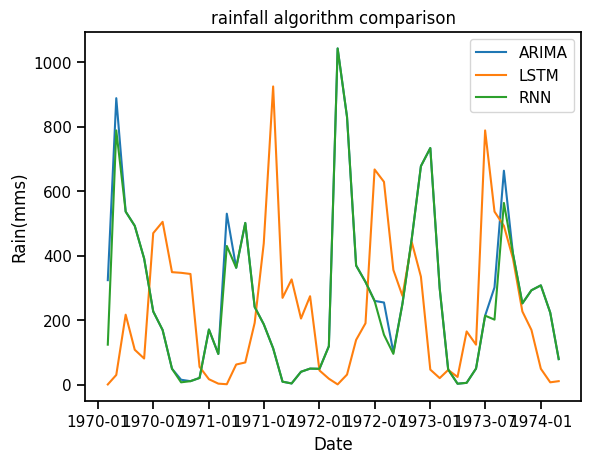

In [130]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
x = df_forecast2['VALUE1']
X1=df_forecast3['VALUE3']
X2=df_forecast1['VALUE2']
y=df_forecast2['DATE']
fig, ax = plt.subplots()
ax.plot(y, x, label='ARIMA')
ax.plot(y, X1, label='LSTM')
ax.plot(y, X2, label='RNN')
ax.set_xlabel('Date')
ax.set_ylabel('Rain(mms)')
ax.set_title("rainfall algorithm comparison")
ax.legend()

In [131]:
Actual_value=[30.8,60.3,257.2,148.4,131.2,429.9,555.1,329.0
,367.0,343.4,85.4,37.0,15.7,3.5,92.6,109.0,231.6,538.2,914.9
,299.3,366.5,235.2,194.4,96.2,58.6,30.0,51.4,178.9,220.6,697.5
,689.0,316.0,255.6,471.4,315.1,76.8,30.5,65.7,44.1,135.2
,224.2,858.5,516.8,472.7,341.2,177.2,149.7,79.5,40.4,15.0
]

In [132]:
actual=pd.DataFrame({'DATE':np.array(fd1),'VALUE4':Actual_value})
actual['DATE']=pd.to_datetime(actual['DATE'])
y1=actual['DATE']
x5=actual['VALUE4']

<Figure size 640x480 with 0 Axes>

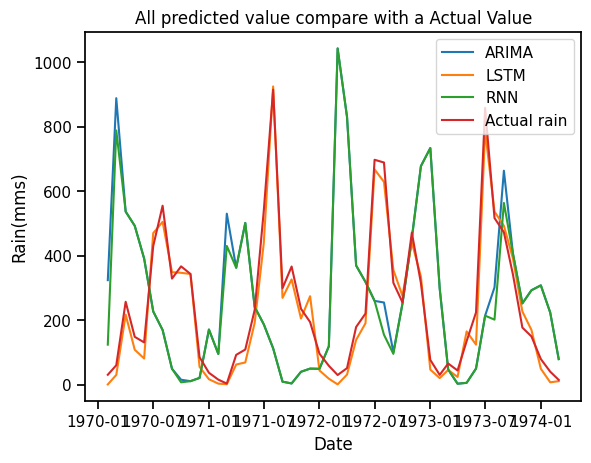

In [133]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
x = df_forecast2['VALUE1']
X1=df_forecast3['VALUE3']
X2=df_forecast1['VALUE2']
x5=actual['VALUE4']
y=df_forecast2['DATE']
fig, ax = plt.subplots()
ax.plot(y, x, label='ARIMA')
ax.plot(y, X1, label='LSTM')
ax.plot(y, X2, label='RNN')
ax.plot(y, x5, label='Actual rain')
ax.set_xlabel('Date')
ax.set_ylabel('Rain(mms)')
ax.set_title("All predicted value compare with a Actual Value")
ax.legend()